In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.pylab as pl
import matplotlib as mpl
import scipy
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
mpl.rcParams['figure.dpi']=300

plt.rcParams.update({
    "text.usetex": True,
    "font.size" : 16,
    "font.family": "serif",
    "font.serif": 'cm10',
    'savefig.bbox' : 'tight'})

from utils.array import array_pattern,get_lobes_positions

/var/folders/cw/5xff940s6559c90nyhzx9s9m0000gn/T/ipykernel_21533/61741219.py:7: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


## 12.

Consider again the arrays in 1) (i.e. M = 24) with d = λ and d = 2λ. Assume that each element is of size d and include the element factor in the computation of the array pattern. Compare with the results in 1) and discuss the differences.


In [2]:
#Assume a linear array with M = 24 elements with unity weight. 
#Let the elements be uniformly spaced and try four different element spacings: d = λ/4, λ/2, λ, and 2λ. 
#Plot the results and discuss the differences as the inter-element distance varies.

# Number of elements
M=24
# Wavelength
lambda_ = 1#m
# Weigths vector
weights = np.ones(M)
# k values
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_

def element_aperture_pattern(k,d):
    
    return np.sin(k*d/2)/(k/2)

def db(x):
    
    return 20*np.log10(np.abs(x)/np.max(np.abs(x)))


######### For d = lambda

# Spacing
spacing = lambda_
# Elements positions vector
positions = np.arange(0,M,1)*spacing



pattern_element_lambda = element_aperture_pattern(k_values,spacing)
pattern_lambda = array_pattern(positions,weights,k_values)
pattern_composite_lambda = pattern_element_lambda*pattern_lambda


######### For d = 2*lambda

# Spacing
spacing = 2*lambda_
# Elements positions vector
positions = np.arange(0,M,1)*spacing

pattern_element_2lambda = element_aperture_pattern(k_values,spacing)
pattern_2lambda = array_pattern(positions,weights,k_values)
pattern_composite_2lambda = pattern_element_2lambda*pattern_2lambda

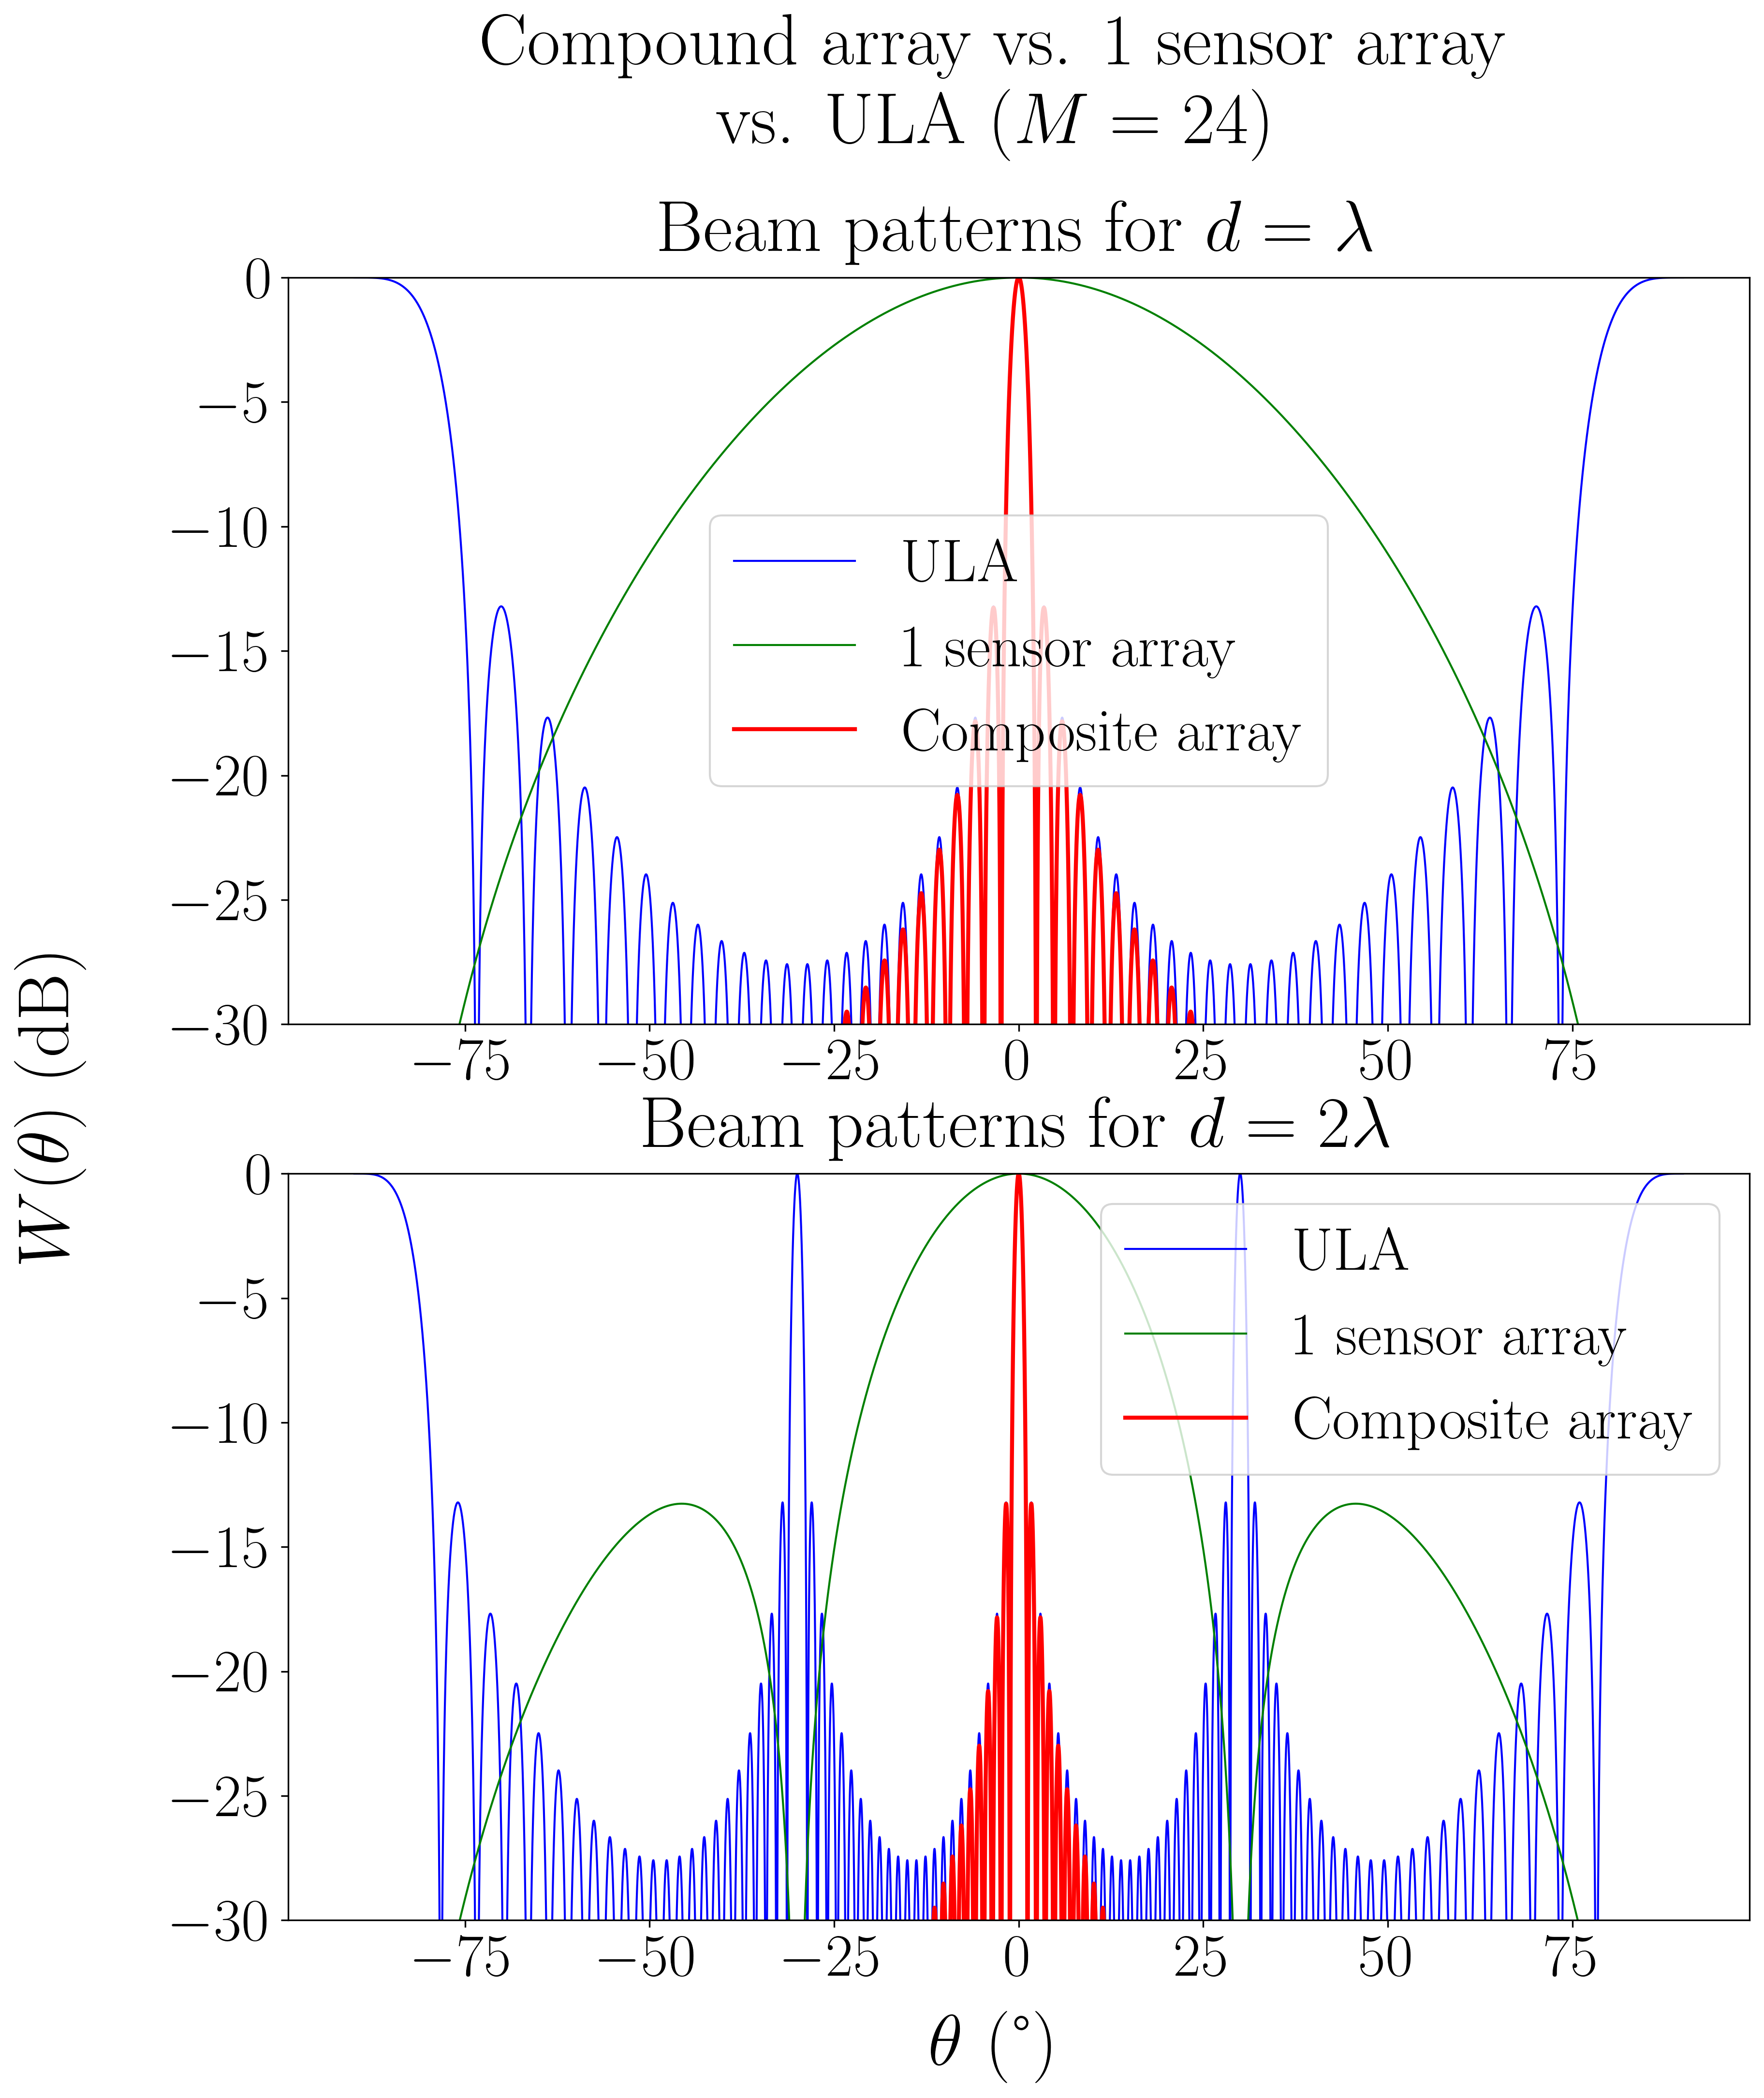

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams.update({'font.size': 30})


# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2,figsize=(13,15))


    
    #params = get_lobes_positions(patterns[i],np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)

ax1,ax2 = axs.flat
  
ax1.set_title('Beam patterns for $d=\lambda$',y=1.02)
ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,db(pattern_lambda),color='blue',linewidth=1,label='ULA')
ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,db(pattern_element_lambda),color='green',linewidth=1,label='1 sensor array')
ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,db(pattern_composite_lambda),color='red',linewidth=2,label='Composite array')
ax1.set_ylim([-30,0])
ax1.legend(loc='best')

ax2.set_title('Beam patterns for $d=2\lambda$',y=1.02)

ax2.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,db(pattern_2lambda),color='blue',linewidth=1,label='ULA')
ax2.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,db(pattern_element_2lambda),color='green',linewidth=1,label='1 sensor array')
ax2.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,db(pattern_composite_2lambda),color='red',linewidth=2,label='Composite array')
ax2.set_ylim([-30,0])
ax2.legend(loc='best')


fig.supxlabel('$\\theta$ (°)',y=0.05)
fig.supylabel('$W(\\theta)$ (dB)',x=-0.02)
fig.suptitle('Compound array vs. 1 sensor array \n vs. ULA ($M=24$)',y=1.001)
plt.savefig('images/array/compound_vs_ula_1sensor_patterns_deg.png',dpi=300)

## 13

Apply steering to the array with the element respons in the previous paragraph and see what happens as the steering angle is increased. Comment on your results.

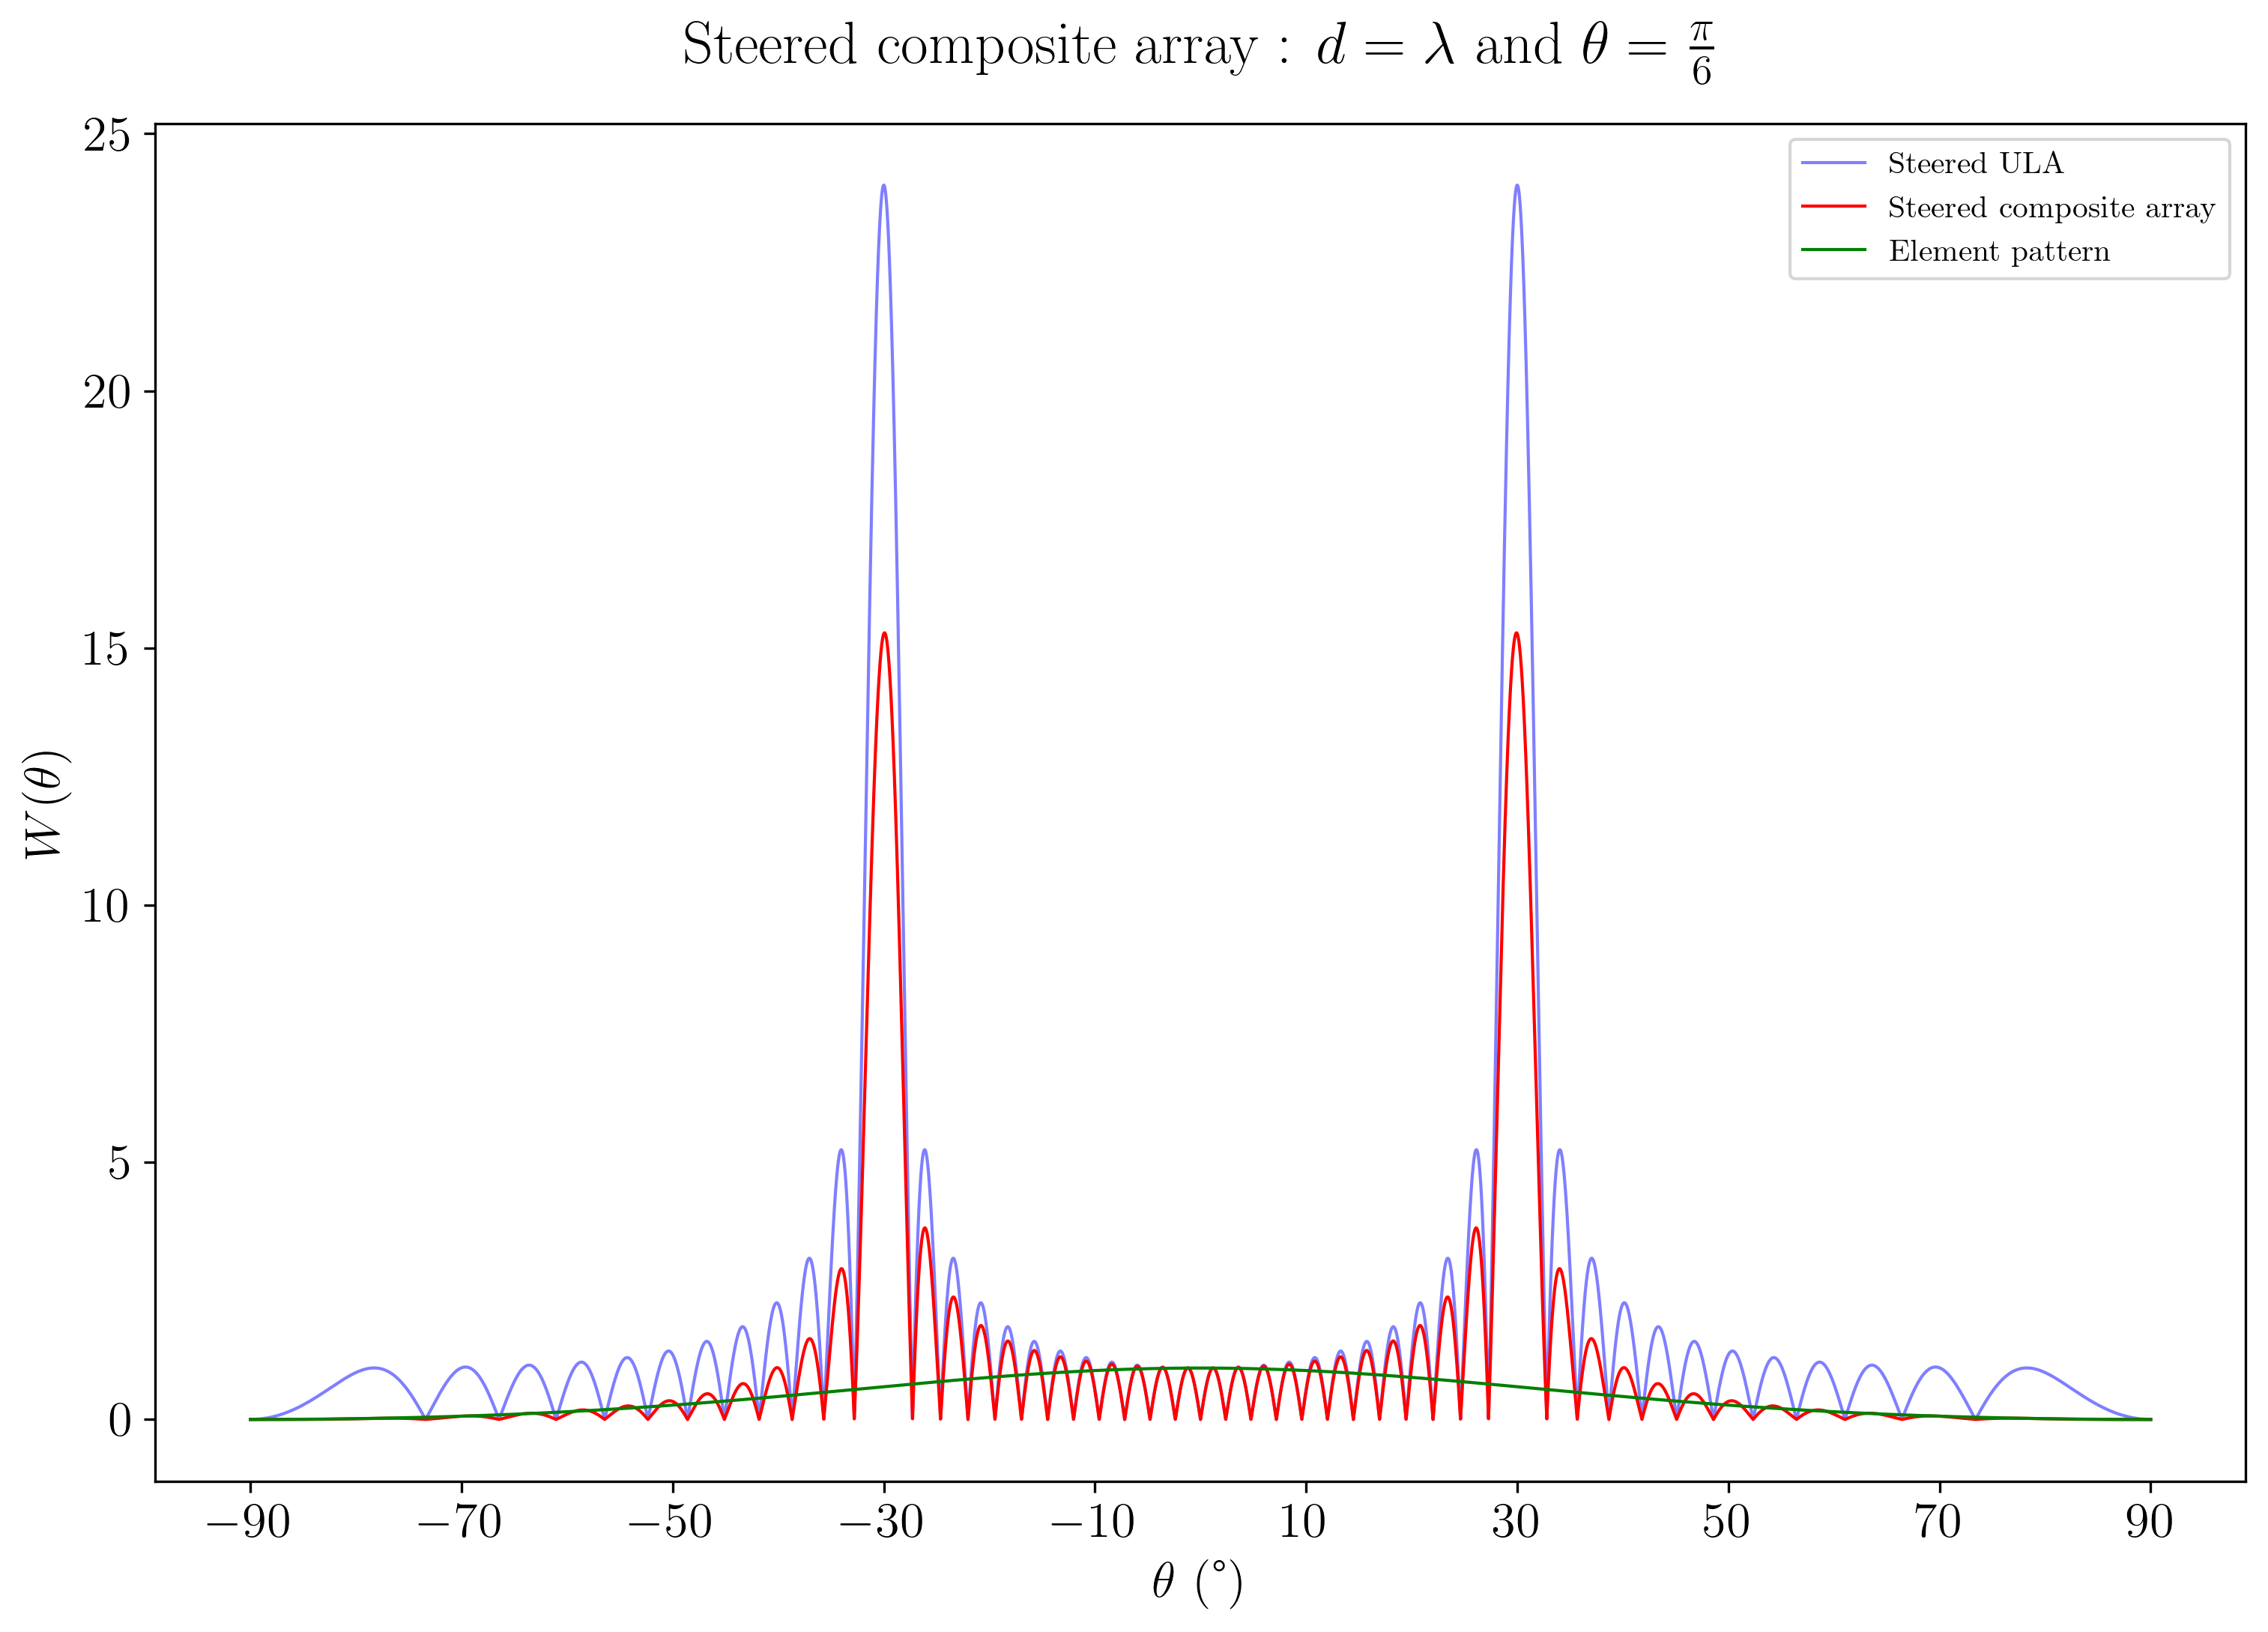

In [4]:
# Spacing
spacing = lambda_
# Elements positions vector
positions = np.arange(0,M,1)*spacing
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_

steering_angle = np.pi/6

######### For d = lambda

# Spacing
spacing = lambda_
# Elements positions vector
positions = np.arange(0,M,1)*spacing

pattern_element_2lambda = element_aperture_pattern(k_values,spacing)
steered_pattern_2lambda = array_pattern(positions,weights,k_values-2*np.pi/lambda_*np.sin(steering_angle))
steered_pattern_composite_2lambda = pattern_element_2lambda*steered_pattern_2lambda

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 16})

plt.title('Steered composite array : $d=\lambda$ and $\\theta=\\frac{\pi}{6}$ ',y=1.03)
plt.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,np.abs(steered_pattern_2lambda),color='blue',linewidth=1,label='Steered ULA',alpha=0.5)
plt.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,np.abs(steered_pattern_composite_2lambda),color='red',linewidth=1,label='Steered composite array')
plt.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,np.abs(pattern_element_2lambda),color='green',linewidth=1,label='Element pattern')
plt.xticks(np.arange(-90,110,20))

plt.xlabel('$\\theta$ (°)',y=0.05)
plt.ylabel('$W(\\theta)$',x=-0.02)
plt.legend(loc='best',fontsize=10)
plt.savefig('images/array/steered_compound_array_description.png',dpi=300)

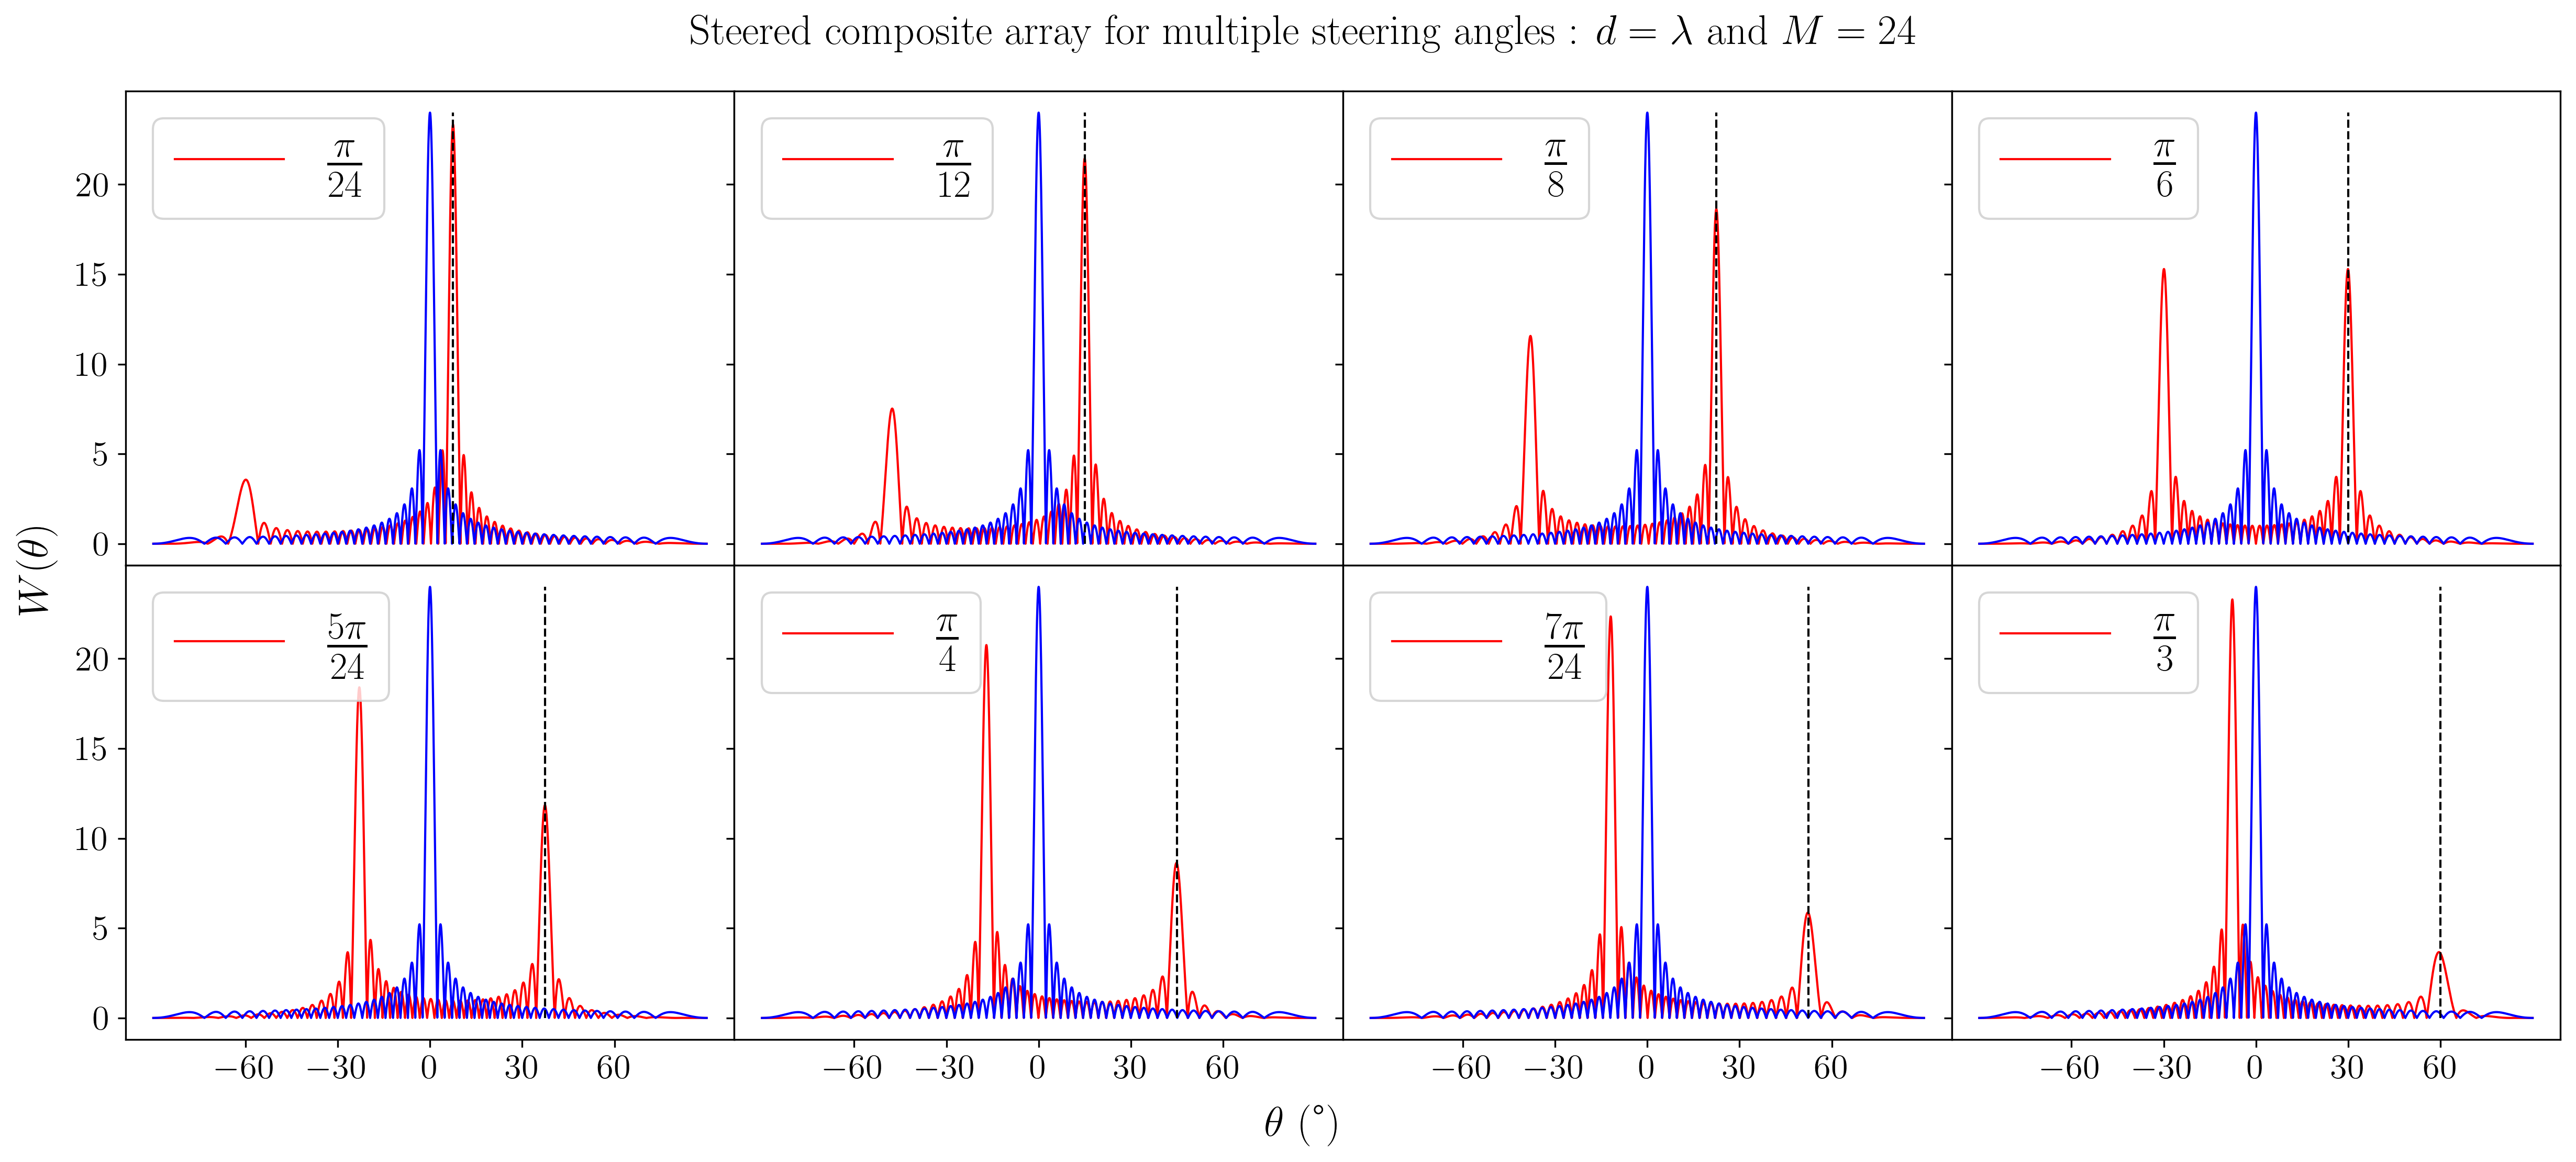

In [5]:
######### For d = lambda

# Spacing
spacing = lambda_
# Elements positions vector
positions = np.arange(0,M,1)*spacing
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
# Steering angles
steering_angles = np.arange(np.pi/24,np.pi/3+np.pi/24,np.pi/24)
labels = ['$\\frac{\pi}{24}$','$\\frac{\pi}{12}$','$\\frac{\pi}{8}$','$\\frac{\pi}{6}$',
          '$\\frac{5\pi}{24}$','$\\frac{\pi}{4}$','$\\frac{7\pi}{24}$','$\\frac{\pi}{3}$']


fig,axs = plt.subplots(2,4,sharex=True,sharey=True,figsize=(20,8))

for i in range(len(steering_angles)) :
    
    ax = axs.flat[i]
    
    pattern_element_2lambda = element_aperture_pattern(k_values,spacing)
    steered_pattern_2lambda = array_pattern(positions,weights,k_values-2*np.pi/lambda_*np.sin(steering_angles[i]))
    steered_pattern_composite_2lambda = pattern_element_2lambda*steered_pattern_2lambda

    pattern_2lambda = array_pattern(positions,weights,k_values)
    pattern_composite_2lambda = pattern_element_2lambda*pattern_2lambda

    #plt.rcParams.update({'font.size': 16})

    #plt.title('Steered composite array : $d=2\lambda$ and $\\theta=\\frac{\pi}{6}$ ',y=1.03)
    ax.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,np.abs(steered_pattern_composite_2lambda),color='red',linewidth=1,label=labels[i])
    ax.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,np.abs(pattern_composite_2lambda),color='blue',linewidth=1)
    ax.plot([steering_angles[i]*180/np.pi,steering_angles[i]*180/np.pi],[0,M],linewidth=1,linestyle='--',color='k')
    ax.legend(loc=2,fontsize=25)
    ax.set_xticks(np.arange(-60,90,30))
    ax.set_yticks(np.arange(0,M,5))

    
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.supxlabel('$\\theta$ (°)',y=0.04)
fig.supylabel('$W(\\theta)$',x=+0.09)
fig.suptitle('Steered composite array for multiple steering angles : $d=\lambda$ and $M=24$',y=0.94)
plt.savefig('images/array/steered_composite_arrays_multiple_steering_angles.png',dpi=300)

## 14

Linear arrays with element spacing larger than λ/2 are regularly used in medical ultrasound imaging systems. Assume 24 unity weighted, regularly spaced elements and an element of size d equal to the element spacing. Design a linear array with as large aperture as possible that makes it possible to steer ±15◦ with acceptable sidelobe and grating lobe levels.


[0.5        0.63636364 0.77272727 0.90909091 1.04545455 1.18181818
 1.31818182 1.45454545 1.59090909 1.72727273 1.86363636 2.        ]


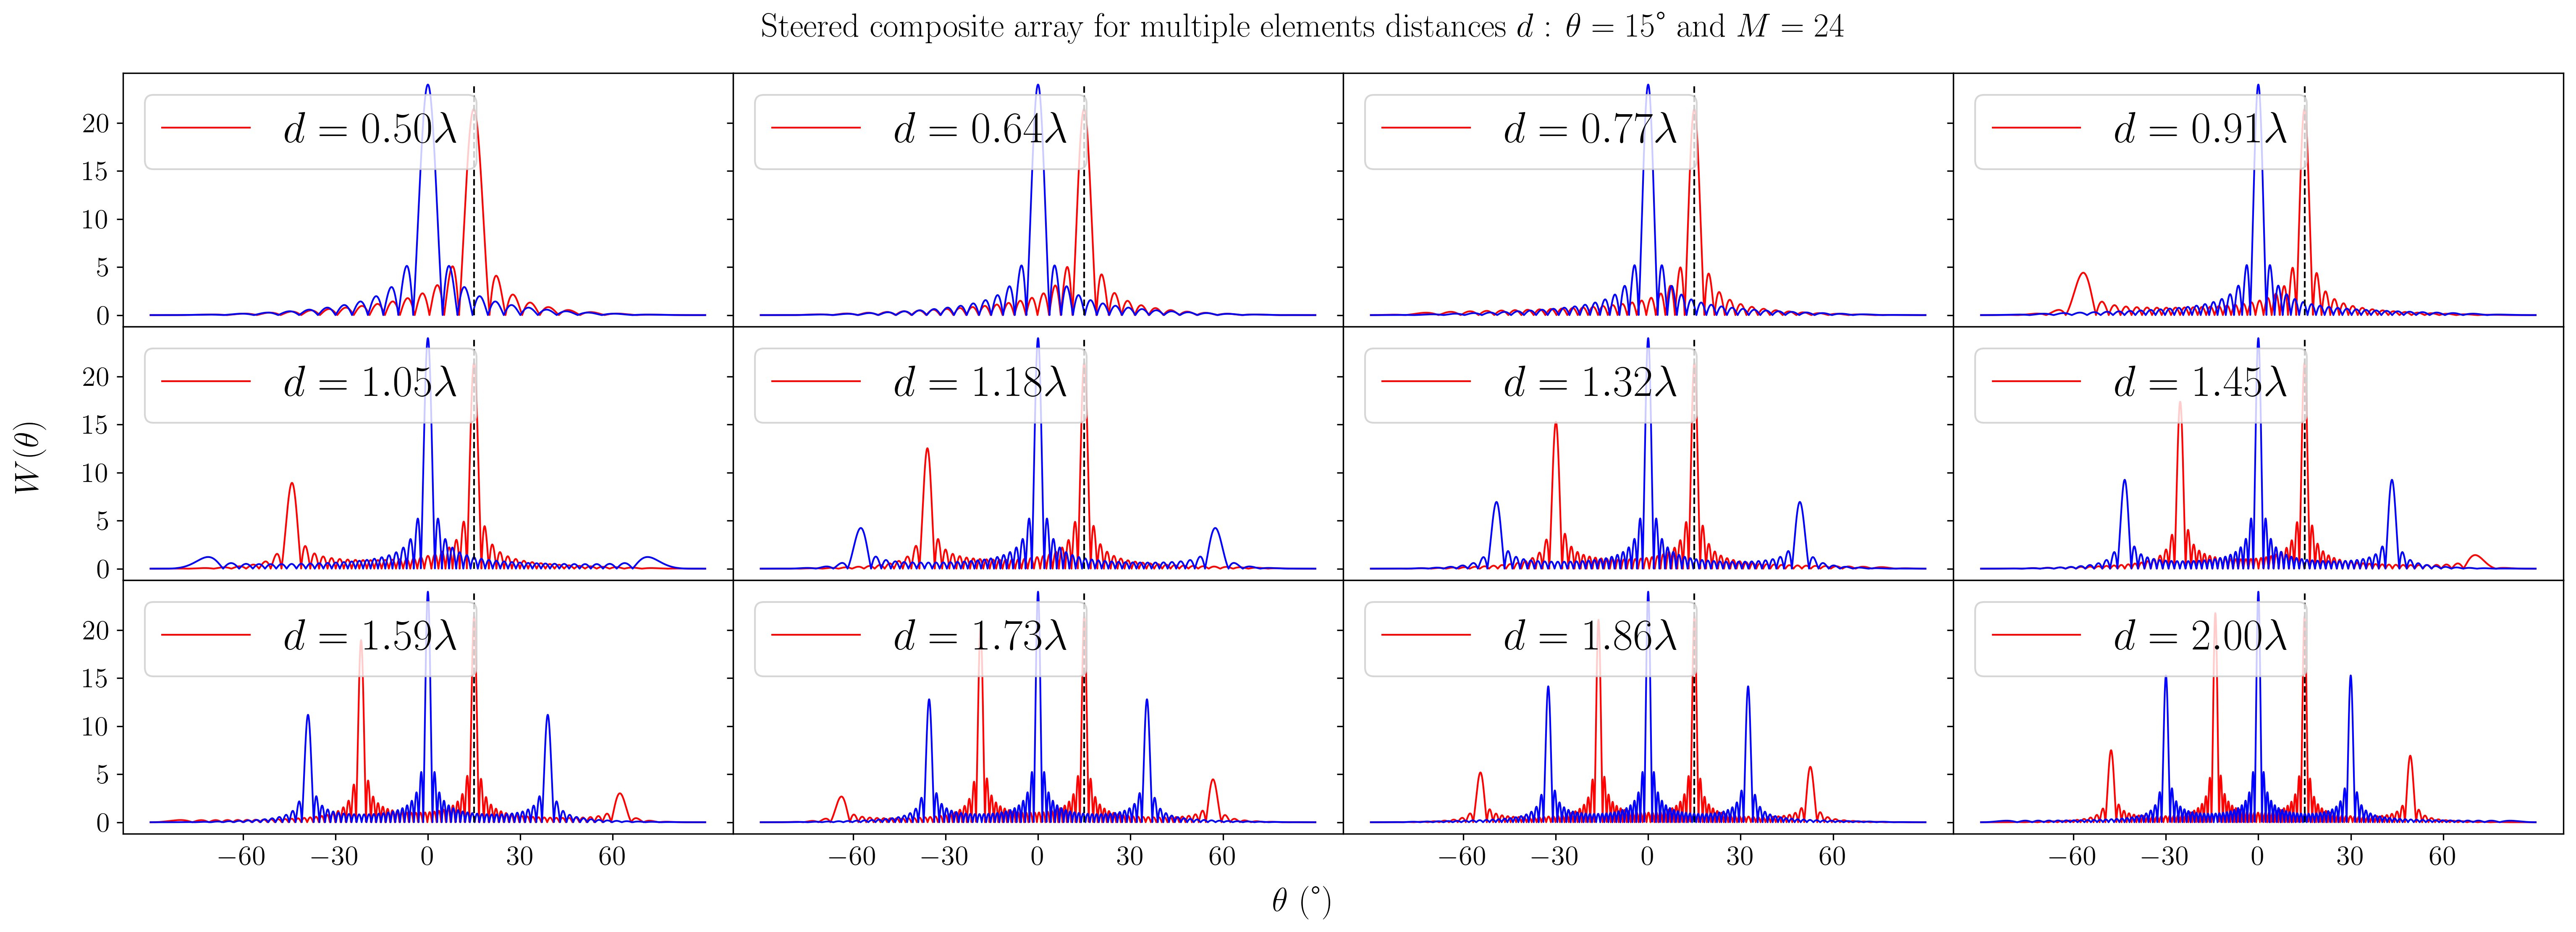

In [9]:
######### For d = lambda
# Steering angle
steering_angle = np.pi/12
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
# Spacing
spacings = np.linspace(lambda_/2,2*lambda_,12)
print(spacings)


labels = ['$d={:.2f}\\lambda$'.format(spacing) for spacing in spacings]


fig,axs = plt.subplots(3,4,sharex=True,sharey=True,figsize=(25,8))

for i in range(len(spacings)) :
    
    # Elements positions vector
    positions = np.arange(0,M,1)*spacings[i]
    
    ax = axs.flat[i]
    
    pattern_element_2lambda = element_aperture_pattern(k_values,spacing)
    steered_pattern_2lambda = array_pattern(positions,weights,k_values-2*np.pi/lambda_*np.sin(steering_angle))
    steered_pattern_composite_2lambda = pattern_element_2lambda*steered_pattern_2lambda

    pattern_2lambda = array_pattern(positions,weights,k_values)
    pattern_composite_2lambda = pattern_element_2lambda*pattern_2lambda

    #plt.rcParams.update({'font.size': 16})

    #plt.title('Steered composite array : $d=2\lambda$ and $\\theta=\\frac{\pi}{6}$ ',y=1.03)
    ax.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,np.abs(steered_pattern_composite_2lambda),color='red',linewidth=1,label=labels[i])
    ax.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,np.abs(pattern_composite_2lambda),color='blue',linewidth=1)
    ax.plot([steering_angle*180/np.pi,steering_angle*180/np.pi],[0,M],linewidth=1,linestyle='--',color='k')
    ax.legend(loc=2,fontsize=25)
    ax.set_xticks(np.arange(-60,90,30))
    ax.set_yticks(np.arange(0,M,5))

    
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.supxlabel('$\\theta$ (°)',y=0.04)
fig.supylabel('$W(\\theta)$',x=+0.09)
fig.suptitle('Steered composite array for multiple elements distances $d$ : $\\theta=15$° and $M=24$',y=0.94)
plt.savefig('images/array/steered_composite_arrays_multiple_distance.png',dpi=300)

In [7]:
np.log10(8)*20

18.06179973983887